In [6]:
import os
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
full_dataset = pd.DataFrame()
for i in range(1,6):
    raw_data = scipy.io.loadmat(f"C:/Users/ameer/Desktop/p300/S{i}.mat")

    participant_id = [i] * len(raw_data['y'])
    timestep = list(range(1,len(raw_data['y'])+1))
    trigger = raw_data["trig"].flatten()
    channel_1 = raw_data['y'][:,0].flatten()
    channel_2 = raw_data['y'][:,1].flatten()
    channel_3 = raw_data['y'][:,2].flatten()
    channel_4 = raw_data['y'][:,3].flatten()
    channel_5 = raw_data['y'][:,4].flatten()
    channel_6 = raw_data['y'][:,5].flatten()
    channel_7 = raw_data['y'][:,6].flatten()
    channel_8 = raw_data['y'][:,7].flatten()
    temp = pd.DataFrame({
        "participant_id": participant_id,
        "timestep" : timestep,
        "channel_1": channel_1,
        "channel_2" : channel_2,
        "channel_3" : channel_3,
        "channel_4" : channel_4,
        "channel_5" : channel_5,
        "channel_6": channel_6,
        "channel_7": channel_7,
        "channel_8": channel_8,
        "trigger": trigger
    })
    full_dataset = pd.concat([full_dataset, temp], axis=0)

In [41]:
full_dataset.to_csv("full_dataset.csv")

In [3]:
data = pd.read_csv("C:/Users/ameer/Desktop/Hackathon/ConfusedMatrixP300/full_dataset.csv")

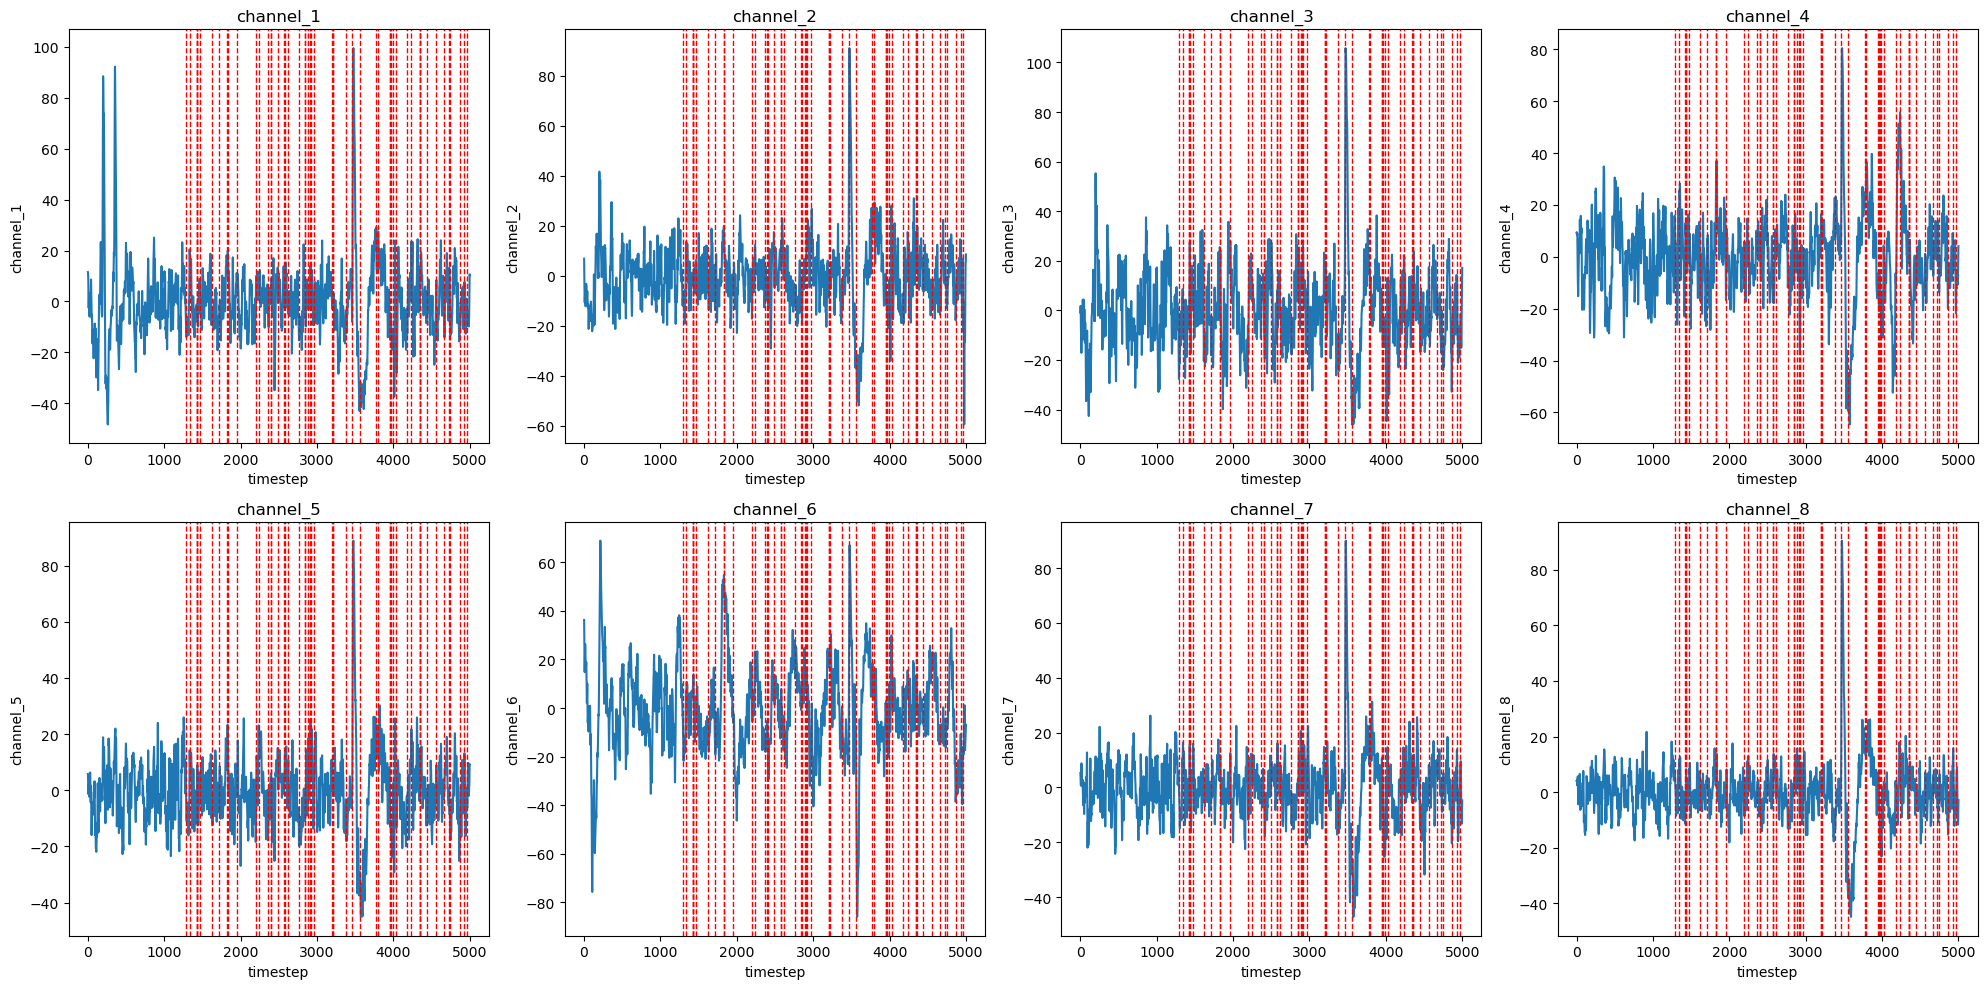

In [7]:
# List of channels
channels = ['channel_1', 'channel_2', 'channel_3', 'channel_4', 
            'channel_5', 'channel_6', 'channel_7', 'channel_8']

# Create subplots with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust the figsize to make it look better

# Flatten the axes for easier indexing in the loop
axes = axes.flatten()

# Filter data for timesteps between 0 and 5000
filtered_data = data[(data['timestep'] >= 0) & (data['timestep'] <= 5000)]

# Get the timestep(s) where trigger == 1 and filter them based on the same condition
trigger_times = filtered_data[filtered_data['trigger'] == 1]['timestep']

# Loop over the channels and plot each one
for i, channel in enumerate(channels):
    # Plot the line for the current channel
    sns.lineplot(x='timestep', y=channel, data=filtered_data[filtered_data['participant_id'] == 1], ax=axes[i])
    
    # Add vertical lines for each trigger time with adjusted linewidth
    for trigger_time in trigger_times:
        axes[i].axvline(x=trigger_time, color='red', linestyle='--', linewidth=1)  # Adjust linewidth as needed
    
    # Set title for the subplot
    axes[i].set_title(channel)

# Adjust layout
plt.tight_layout()
plt.show()
